In [5]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

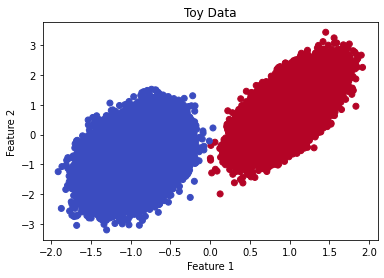

In [6]:
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

#plot X and y values
X, y = load_dataset("toydata_large.csv")
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy Data')
plt.show()


Last 10 values of y:  [1 1 0 1 1 1 0 0 1 0]
First 10 values of X:  [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113,

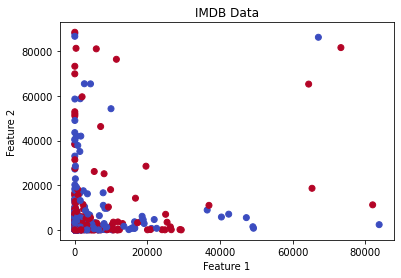

In [7]:
import numpy as np
from keras.datasets import imdb
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import pad_sequences

def load_imdb_dataset(num_samples=100, max_length=500):
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz", num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3)
    
    
    
    # Since we're using padding, we'll treat each index as a categorical feature without scaling
    # StandardScaler is not applicable here; you might consider different preprocessing if needed
    
    # Print the last 10 values of y
    print("Last 10 values of y: ", y_train[-10:])
    
    
    # print first 10 values of X
    print("First 10 values of X: ", x_train[:10])
    # cut x and y into num samples
    x_train = x_train[:num_samples]
    y_train = y_train[:num_samples]
    # create np array of both 
    x_train = pad_sequences(x_train, maxlen=max_length)
    print("Shape of x_train: ", x_train.shape)
    y_train = np.array(y_train)
    return x_train, y_train

# Usage
X, y = load_imdb_dataset(1000,2)

# plot the features of X to y value (0/1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('IMDB Data')
plt.show()




Accuracy of the SVM model on the test set: 0.98


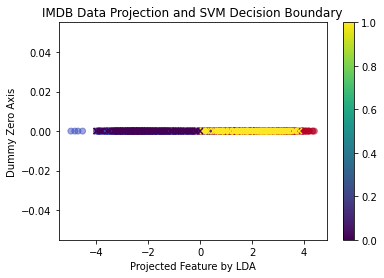

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer

def tfidf_transform(x_train, num_features=10000):
    # Initialize tokenizer with a given number of words
    tokenizer = Tokenizer(num_words=num_features)
    tokenizer.fit_on_sequences(x_train)
    
    # Convert sequences to text list
    x_train_text = [" ".join(map(str, sequence)) for sequence in x_train]
    
    # Apply TF-IDF transformation
    tfidf = TfidfVectorizer(max_features=num_features, dtype=np.float32)
    x_train_tfidf = tfidf.fit_transform(x_train_text)
    
    return x_train_tfidf.toarray()


from sklearn.feature_selection import SelectKBest, chi2

def select_features(X, y, k=500):
    # Apply Chi-squared test to select the top k features
    chi2_selector = SelectKBest(chi2, k=k)
    X_kbest_features = chi2_selector.fit_transform(X, y)
    return X_kbest_features


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def apply_lda(X, y):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(X, y)
    return X_lda


import matplotlib.pyplot as plt

def plot_data(X, y):
    plt.figure(figsize=(8, 4))
    plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), c=y, cmap='coolwarm', alpha=0.5)
    plt.colorbar()  # Show color scale
    plt.xlabel('Projected Feature')
    plt.ylabel('Dummy Zero Axis')
    plt.title('IMDB Data Projection via LDA')
    plt.show()

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def load_and_preprocess_imdb(num_samples=1000, max_length=500, num_features=10000, top_k_features=500):
    # Load the dataset
    (x_train, y_train), _ = imdb.load_data(num_words=num_features)
    x_train = x_train[:num_samples]
    y_train = y_train[:num_samples]
    
    # Pad sequences
    x_train_padded = pad_sequences(x_train, maxlen=max_length)
    
    # Convert sequences to a list of strings
    tokenizer = Tokenizer(num_words=num_features)
    tokenizer.fit_on_sequences(x_train_padded)
    x_train_text = [" ".join(map(str, seq)) for seq in x_train_padded]

    # Apply TF-IDF transformation
    tfidf = TfidfVectorizer(max_features=num_features, dtype=np.float32)
    x_train_tfidf = tfidf.fit_transform(x_train_text)

    # Convert TF-IDF sparse output to a dense array
    x_train_tfidf_dense = x_train_tfidf.toarray()

    # Select top k features
    selector = SelectKBest(chi2, k=top_k_features)
    x_train_kbest = selector.fit_transform(x_train_tfidf_dense, y_train)

    # Apply LDA
    lda = LinearDiscriminantAnalysis(n_components=1)
    x_train_lda = lda.fit_transform(x_train_kbest, y_train)
    
    return x_train_lda, y_train
# Load and preprocess the data
X_processed, y_processed = load_and_preprocess_imdb()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.25, random_state=42)

# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model on the test set: {accuracy:.2f}")

# Optional: Visualization of decision boundary
plt.scatter(X_processed[:, 0], np.zeros_like(X_processed[:, 0]), c=y_processed, cmap='coolwarm', alpha=0.5)
plt.scatter(X_test[:, 0], np.zeros_like(X_test[:, 0]), c=y_pred, marker='x')
plt.colorbar()  # Show color scale
plt.xlabel('Projected Feature by LDA')
plt.ylabel('Dummy Zero Axis')
plt.title('IMDB Data Projection and SVM Decision Boundary')
plt.show()



In [9]:
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # print last 10 values of y
    print("Last 10 values of y: ", y[-10:])
    
    # print the shape of X and y
    print("X shape: ", X.shape)
    print("y shape: ", y.shape)
    return X, y

load_dataset("toydata_large.csv")

Last 10 values of y:  [ 1  1  1  1  1 -1 -1  1 -1 -1]
X shape:  (200000, 8)
y shape:  (200000,)


(array([[-0.32919639, -0.35070302, -0.67340164, ..., -0.62987411,
         -0.69378638, -0.58988026],
        [-0.51370827, -0.99752431, -0.71423781, ..., -0.8880327 ,
         -0.226683  , -0.62179136],
        [-0.77826341, -0.81688626, -0.96313581, ..., -0.94694026,
         -0.38384426, -0.69624167],
        ...,
        [ 0.19967671,  0.91949855,  0.69596593, ...,  0.91069955,
          0.88355407,  1.1106231 ],
        [-1.24416957, -1.05789773, -1.06342509, ..., -1.14555687,
         -1.51647387, -1.04356356],
        [-0.91826969, -1.09715139, -1.13913872, ..., -1.36532045,
         -1.42941929, -1.27194863]]),
 array([-1, -1, -1, ...,  1, -1, -1], dtype=int64))

In [23]:
import numpy as np

def svm_loss(W, X, y, C):
    distances = 1 - y * np.dot(X, W)
    hinge_loss = C * np.mean(np.maximum(0, distances))
    regularization_loss = 0.5 * np.dot(W, W)
    return regularization_loss + hinge_loss

def svm_gradient(W, X_batch, y_batch, C):
    distances = 1 - y_batch * np.dot(X_batch, W)
    dw = np.zeros_like(W)
    for ind, d in enumerate(distances):
        if d > 0:
            # Only the misclassified points affect the gradient
            dw += C * (-y_batch[ind] * X_batch[ind])
    dw /= len(y_batch)  # Average over the batch
    dw += W  # Add gradient of the regularization term
    return dw

def train_linear_svm(X, y, batch_size=10, C=1.0, epochs=1000, lr=0.01):
    w = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1])  # Improved initialization
    n_batches = int(np.ceil(len(y) / batch_size))
    for epoch in range(epochs):
        perm = np.random.permutation(len(y))  # Shuffle the data
        for b in range(n_batches):
            start = b * batch_size
            end = min(start + batch_size, len(y))
            X_batch = X[perm[start:end]]
            y_batch = y[perm[start:end]]
            grad = svm_gradient(w, X_batch, y_batch, C)
            w -= lr * grad
        # Optionally, decrease learning rate gradually
        if (epoch + 1) % 100 == 0:
            lr /= 2
    return w




In [11]:
def train_svm_adagrad(X, y, batch_size=10, C=1.0, epochs=1000, lr=0.01):
    """
    Train a linear SVM using AdaGrad optimization.
    - X: feature matrix
    - y: target vector
    - batch_size: size of the mini-batch
    - C: regularization strength
    - epochs: number of training epochs
    - lr: initial learning rate
    """
    w = np.zeros(X.shape[1])
    epsilon = 1e-8  # smoothing term to avoid division by zero
    gradient_accumulate = np.zeros(X.shape[1])
    n_batches = int(len(y) / batch_size)

    for epoch in range(epochs):
        for b in range(n_batches):
            start = b * batch_size
            end = start + batch_size
            X_batch = X[start:end]
            y_batch = y[start:end]
            grad = svm_gradient(w, X_batch, y_batch, C)
            gradient_accumulate += grad ** 2
            adjusted_lr = lr / (epsilon + np.sqrt(gradient_accumulate))
            w = w - adjusted_lr * grad
    return w


In [12]:
def rff_gaussian_transform(X, omega, b):
    """
    Apply the Random Fourier Features transformation to the dataset.
    - X: feature matrix
    - omega: frequencies matrix
    - b: bias terms
    """
    X_features = np.dot(X, omega) + b
    return np.cos(X_features)

def train_svm_rff(X, y, gamma, n_features, C=1.0, epochs=1000, lr=0.01):
    """
    Train a SVM with RFF approximation for a Gaussian kernel.
    - X: feature matrix
    - y: target vector
    - gamma: parameter of Gaussian kernel
    - n_features: number of random features
    - C: regularization strength
    - epochs: number of training epochs
    - lr: learning rate
    """
    # Create Random Fourier Features transformation parameters
    omega = np.random.normal(scale=2*np.pi*gamma, size=(X.shape[1], n_features))
    b = np.random.uniform(0, 2*np.pi, size=n_features)

    # Transform training data
    X_transformed = rff_gaussian_transform(X, omega, b)
    w = train_linear_svm(X_transformed, y, C=C, epochs=epochs, lr=lr)
    
    return w, omega, b

def predict_rff(X, w, omega, b):
    """
    Predict with the SVM trained on RFF-transformed data.
    - X: original feature matrix
    - w: trained weight vector
    - omega: frequencies matrix used for RFF
    - b: biases used for RFF
    """
    X_transformed = rff_gaussian_transform(X, omega, b)
    return np.sign(np.dot(X_transformed, w))


In [13]:
#  here i try to get some usefull stuff from the imdb data lol

import numpy as np

def predict(X, w):
    """
    Predict using the trained weights of the SVM.
    - X: feature matrix
    - w: weight vector
    """
    return np.sign(np.dot(X, w))

def accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.
    - y_true: true labels
    - y_pred: predicted labels
    """
    return np.mean(y_true == y_pred)

def main():
    from sklearn.model_selection import train_test_split
    
    # Load your dataset here (e.g., IMDB or your CSV dataset)
    data_parameter = [1,2,5,10,20]
    for i in data_parameter:
        X, y = load_imdb_dataset(500,i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(y_train)
        w_linear = train_linear_svm(X_train, y_train, batch_size=10, C=0, epochs=1, lr=0.01)
        predictions_linear = predict(X_test, w_linear)
        acc_linear = accuracy(y_test, predictions_linear)
        print("Accuracy of Linear SVM:", acc_linear)
    

if __name__ == "__main__":
    main()


Last 10 values of y:  [1 1 0 1 1 1 0 0 1 0]
First 10 values of X:  [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113,

In [27]:
import numpy as np

def predict(X, w):
    """
    Predict using the trained weights of the SVM.
    - X: feature matrix
    - w: weight vector
    """
    return np.sign(np.dot(X, w))

def accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions.
    - y_true: true labels
    - y_pred: predicted labels
    """
    return np.mean(y_true == y_pred)

def main():
    from sklearn.model_selection import train_test_split
    
    # Load your dataset here (e.g., IMDB or your CSV dataset)
    #X, y = load_imdb_dataset(500,10)  # or load_dataset("path/to/dataset.csv")
    #X, y = load_dataset("toydata_large.csv")
    X, y = load_and_preprocess_imdb()
    # in y convert 0 to -1
    y = np.where(y == 0, -1, 1)
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

    
    # Parameters to explore
    C_values = [0.1, 1.0, 10.0]

    lr_values = [0.00001,0.0001,0.01, 0.1, 0.5,1.0,2]
    batch_size_values = [10, 20, 50]
    gamma_values = [0.001, 0.01, 0.1]
    n_features_values = [100, 500, 1000]
    epochs = 6
    
    # Loop over parameter combinations
    for C in C_values:
            for lr in lr_values:
                for batch_size in batch_size_values:
                            print(f"Training with C={C}, lr={lr}, batch_size={batch_size}")
                            
                            # Train SVM using simple SGD
                            w_linear = train_linear_svm(X_train, y_train, batch_size=batch_size, C=C, epochs=epochs, lr=lr)
                            predictions_linear = predict(X_test, w_linear)
                            print(predictions_linear)
                            acc_linear = accuracy(y_test, predictions_linear)
                            print("Accuracy of Linear SVM:", acc_linear)

                            # Train SVM using AdaGrad
                            w_adagrad = train_svm_adagrad(X_train, y_train, batch_size=batch_size, C=C, epochs=epochs, lr=lr)
                            predictions_adagrad = predict(X_test, w_adagrad)
                            acc_adagrad = accuracy(y_test, predictions_adagrad)
                            print("Accuracy of AdaGrad SVM:", acc_adagrad)

                            print("\n")
                            
    for C in C_values:
            for lr in lr_values:
                for batch_size in batch_size_values:
                    for gamma in gamma_values:
                        for n_features in n_features_values:
                            print(f"Training with C={C}, lr={lr}, batch_size={batch_size}, gamma={gamma}, n_features={n_features}")
                            # Train SVM using RFF
                            w_rff, omega, b = train_svm_rff(X_train, y_train, gamma=gamma, n_features=n_features, C=C, epochs=epochs, lr=lr)
                            predictions_rff = predict_rff(X_test, w_rff, omega, b)
                            acc_rff = accuracy(y_test, predictions_rff)
                            print("Accuracy of RFF SVM:", acc_rff)

                            print("\n")
from sklearn.model_selection import KFold
def main_cross():
    # Load your dataset
    X, y = load_imdb_dataset()
    print(y)

    # Parameters
    C = 1.0
    epochs = 1
    lr = 0.01
    batch_size = 10
    gamma = 0.01
    n_features = 300


    # Initialize KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Initialize lists to store performance metrics across folds
    acc_linear_list = []
    acc_adagrad_list = []
    acc_rff_list = []

    # Perform 5-fold cross-validation
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train and evaluate Linear SVM
        w_linear = train_linear_svm(X_train, y_train, batch_size=batch_size, C=C, epochs=epochs, lr=lr)
        predictions_linear = predict(X_val, w_linear)
        print(predictions_linear)
        acc_linear = accuracy(y_val, predictions_linear)
        acc_linear_list.append(acc_linear)

        # Train and evaluate AdaGrad SVM
        w_adagrad = train_svm_adagrad(X_train, y_train, batch_size=batch_size, C=C, epochs=epochs, lr=lr)
        predictions_adagrad = predict(X_val, w_adagrad)
        acc_adagrad = accuracy(y_val, predictions_adagrad)
        acc_adagrad_list.append(acc_adagrad)

        # Train and evaluate RFF SVM
        w_rff, omega, b = train_svm_rff(X_train, y_train, gamma=gamma, n_features=n_features, C=C, epochs=epochs, lr=lr)
        predictions_rff = predict_rff(X_val, w_rff, omega, b)
        acc_rff = accuracy(y_val, predictions_rff)
        acc_rff_list.append(acc_rff)

    # Calculate average accuracy across all folds
    avg_acc_linear = np.mean(acc_linear_list)
    avg_acc_adagrad = np.mean(acc_adagrad_list)
    avg_acc_rff = np.mean(acc_rff_list)

    # Print the average accuracy for each SVM variant
    print("Average Accuracy of Linear SVM:", avg_acc_linear)
    print("Average Accuracy of AdaGrad SVM:", avg_acc_adagrad)
    print("Average Accuracy of RFF SVM:", avg_acc_rff)
if __name__ == "__main__":
    main()


Training with C=0.1, lr=1e-05, batch_size=10
[-1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.
  1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.
 -1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.
  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
 -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.
 -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.
  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.
 -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
 -1.  1.]
Accuracy of Linear SVM: 0.03
Accuracy of AdaGrad SVM: 0.97


Training with C=0.1, lr=1e-05, batch_size=20
[-1. -1. -1.  1.  1.  1.  1.  1. -1.

KeyboardInterrupt: 

In [15]:
# best old version

'''

def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # print last 10 values of y
    print("Last 10 values of y: ", y[-10:])
    
    # print the shape of X and y
    print("X shape: ", X.shape)
    print("y shape: ", y.shape)
    return X, y
# Generate non-linearly separable data using make_moons
def generate_non_linear_data(n_samples=100, noise=0.1):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    return X, y
# Load and standardize the dataset
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Train and evaluate a standard SVM
def train_standard_svm(X, y, test_size=0.2, C=1.0, kernel='linear'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Manual SVM implementation using gradient descent
def hinge_loss_gradient(w, x, y, lambda_reg):
    # print shapes of w, x, y

    if y * np.dot(w, x) < 1:
        return -y * x + lambda_reg * w
    return lambda_reg * w


def train_manual_svm(X, y, epochs=1, eta=0.01, lambda_reg=0.01, batch_size=100):
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):

                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                w -= eta * grad
    return w

def evaluate_svm(X, y, w):
    predictions = np.sign(X @ w)
    accuracy = np.mean(predictions == y)
    return accuracy

# SVM with Random Fourier Features (RFF)
def random_fourier_features(X, n_features=300, gamma=1.0):
    """ Generate and apply Random Fourier Features for SVM. """
    D = X.shape[1]
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    X_rff = np.sqrt(2 / n_features) * np.cos(np.dot(X, omega.T) + b)
    return X_rff, omega, b

def train_and_evaluate_with_rff(X, y, n_features, gamma=1.0, C=1.0, eta=0.01, epochs=5, batch_size=10):
    X_rff = random_fourier_features(X, n_features, gamma)
    w = train_manual_svm(X_rff, y, epochs, eta, C, batch_size)
    accuracy = evaluate_svm(X_rff, y, w)
    return accuracy

def train_adagrad_svm(X, y, epochs=1, eta=1, lambda_reg=0.1, batch_size=10):
    w = np.zeros(X.shape[1])
    g_accumulate = np.zeros(X.shape[1])  # Gradient accumulation for Adagrad
    epsilon = 1e-8  # Smoothing term to avoid division by zero
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                g_accumulate += grad**2
                adjusted_eta = eta / (np.sqrt(g_accumulate) + epsilon)
                w -= adjusted_eta * grad
    return w
def decision_function(X, w):
    return np.sign(np.dot(X, w))

# Generate Random Fourier Features
def generate_rff_parameters(n_features, D, gamma=1.0):
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    return omega, b

def apply_rff(X, omega, b):
    X_rff = np.sqrt(2 / omega.shape[0]) * np.cos(np.dot(X, omega.T) + b)
    return X_rff



def plot_decision_boundary(X, y, model_func, title="Decision Boundary", accuracy=None):
    """
    Plot decision boundary for a 2D projection of the dataset and display accuracy.
    
    Parameters:
        X (np.array): The input features, can be more than 2D.
        y (np.array): The target variable (labels).
        model_func (function): A function that takes an array of inputs and returns model predictions.
        feature_indices (tuple): A tuple of indices to specify which two features to use for the plot.
        title (str): The plot title.
        accuracy (float): The accuracy of the model, if available.
    """
    # Select two features based on indices
    # Default
    feature_indices=(0, 1)
    x_idx, y_idx = feature_indices
    x_min, x_max = X[:, x_idx].min() - 1, X[:, x_idx].max() + 1
    y_min, y_max = X[:, y_idx].min() - 1, X[:, y_idx].max() + 1
    h = 0.1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Prepare grid for model
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Transform grid back to original feature space if necessary
    if X.shape[1] > 2:
        full_grid = np.zeros((grid.shape[0], X.shape[1]))
        full_grid[:, x_idx] = grid[:, 0]
        full_grid[:, y_idx] = grid[:, 1]
        grid = full_grid
    
    # Predict probabilities or class labels
    probs = model_func(grid).reshape(xx.shape)
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
    plt.scatter(X[:, x_idx], X[:, y_idx], c=y, cmap="RdBu", edgecolors="k")
    if accuracy is not None:
        plt.title(f"{title} - Accuracy: {accuracy:.2%}")
    else:
        plt.title(title)
    plt.xlabel(f"Feature {x_idx + 1}")
    plt.ylabel(f"Feature {y_idx + 1}")
    plt.colorbar()
    plt.show()
from sklearn.model_selection import train_test_split, cross_val_score
def train_standard_svm_with_cv(X, y, C=1.0, kernel='linear', cv_folds=5):
    """
    Train and evaluate a standard SVM using cross-validation.
    Parameters:
        X (np.array): Input features.
        y (np.array): Target labels.
        C (float): Regularization parameter.
        kernel (str): Kernel type of the SVM.
        cv_folds (int): Number of cross-validation folds.
    Returns:
        mean_accuracy (float): Mean accuracy across the cross-validation folds.
    """
    model = SVC(kernel=kernel, C=C)
    accuracies = cross_val_score(model, X, y, cv=cv_folds, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    return mean_accuracy
from sklearn.model_selection import StratifiedKFold
def cross_validate_svm(X, y, train_func, predict_func, params, cv_folds=5):
    """
    Perform cross-validation for manually implemented SVM models.
    
    Parameters:
        X (np.array): Input features.
        y (np.array): Target labels.
        train_func (callable): Training function.
        predict_func (callable): Prediction function.
        params (dict): Parameters for the training function.
        cv_folds (int): Number of cross-validation folds.
        
    Returns:
        float: Mean accuracy across the cross-validation folds.
    """
    kf = StratifiedKFold(n_splits=cv_folds)
    accuracies = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        model = train_func(X_train, y_train, **params)
        
        # Predict the results
        predictions = predict_func(X_test, model)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)
def test_cross ():
    # Assume X, y are loaded properly
    X, y = generate_non_linear_data(100, 0.2)

    # Parameters for Manual SVM
    for eta in [0.01, 0.05]:
        for lambda_reg in [0.01, 0.1]:
            params = {'epochs': 1, 'eta': eta, 'lambda_reg': lambda_reg}
            mean_accuracy = cross_validate_svm(X, y, train_manual_svm, lambda X, w: decision_function(X, w), params)
            print(f"Manual SVM - eta: {eta}, lambda: {lambda_reg}, CV Accuracy: {mean_accuracy:.2f}")
    
    # Parameters for Adagrad SVM
    for eta in [0.1, 0.5, 1.0]:
        for lambda_reg in [0.01, 0.05, 0.1]:
            params = {'epochs': 1, 'eta': eta, 'lambda_reg': lambda_reg}
            mean_accuracy = cross_validate_svm(X, y, train_adagrad_svm, lambda X, w: decision_function(X, w), params)
            print(f"Adagrad SVM - eta: {eta}, lambda: {lambda_reg}, CV Accuracy: {mean_accuracy:.2f}")
    
    # Parameters for SVM with Random Fourier Features
    for n_features in [100, 300]:
        for gamma in [0.5, 1.0]:
            params = {'n_features': n_features, 'gamma': gamma}
            mean_accuracy = cross_validate_svm(X, y, train_and_evaluate_with_rff, lambda X, w: decision_function(apply_rff(X, omega, b), w_rff), params)
            print(f"RFF SVM - Features: {n_features}, Gamma: {gamma}, CV Accuracy: {mean_accuracy:.2f}")
def test():
    #X, y = load_dataset("toydata_large.csv")
    X, y = load_imdb_dataset(1000,100)
    # print shapes
    print("X shape: ", X.shape)
    print("y shape: ", y.shape)
    print("svm sttandard", train_standard_svm_with_cv(X, y))
    # Parameters for Manual SVM
    for eta in [0.01, 0.05]:
        for lambda_reg in [0.01, 0.1]:
            w_manual = train_manual_svm(X, y, epochs=1, eta=eta, lambda_reg=lambda_reg)
            manual_predictions = decision_function(X, w_manual)
            manual_accuracy = accuracy_score(y, manual_predictions)
            print(f"Manual SVM - eta: {eta}, lambda: {lambda_reg}, Accuracy: {manual_accuracy:.2f}")
            #plot_decision_boundary(X, y, lambda x: decision_function(x, w_manual), f"Manual SVM - eta: {eta}, lambda: {lambda_reg}", manual_accuracy)
    for eta in [0.1, 0.5, 1.0]:
        
        for lambda_reg in [0.01, 0.05, 0.1]:
            w_adagrad = train_adagrad_svm(X, y, epochs=1, eta=eta, lambda_reg=lambda_reg)
            adagrad_predictions = decision_function(X, w_adagrad)
            adagrad_accuracy = accuracy_score(y, adagrad_predictions)
            print(f"Adagrad SVM - eta: {eta}, lambda: {lambda_reg}, Accuracy: {adagrad_accuracy:.2f}")
            #plot_decision_boundary(X, y, lambda x: decision_function(x, w_adagrad), f"Adagrad SVM - eta: {eta}, lambda: {lambda_reg}", adagrad_accuracy)
    # Parameters for SVM with Random Fourier Features
    for n_features in [100, 300]:
        for gamma in [0.5, 1.0]:
            X_rff, omega, b = random_fourier_features(X, n_features, gamma)
            w_rff = train_manual_svm(X_rff, y)
            rff_predictions = decision_function(X_rff, w_rff)
            rff_accuracy = accuracy_score(y, rff_predictions)
            print(f"RFF SVM - Features: {n_features}, Gamma: {gamma}, Accuracy: {rff_accuracy:.2f}")
            #plot_decision_boundary(X, y, lambda x: decision_function(apply_rff(x, omega, b), w_rff), f"RFF SVM - Features: {n_features}, Gamma: {gamma}", rff_accuracy)

# Main execution
if __name__ == "__main__":
    if False:
        X, y = load_dataset("toydata_tiny.csv")

        # SVM with sklearn
        clf = SVC(kernel='linear')
        clf.fit(X, y)
        y_pred = clf.predict(X)
        accuracy = accuracy_score(y, y_pred)
        plot_decision_boundary(X, y, lambda x: clf.predict(x), "Standard SVM", accuracy)

        # Manual SVM - Assuming weights are trained and available as 'w_manual'
        # For demonstration, use random weights
        w_manual = np.random.randn(X.shape[1])
        manual_predictions = decision_function(X, w_manual)
        manual_accuracy = accuracy_score(y, manual_predictions)
        plot_decision_boundary(X, y, lambda x: decision_function(x, w_manual), "Manual SVM", manual_accuracy)

        # Adagrad SVM - Assuming weights are trained and available as 'w_adagrad'
        w_adagrad = np.random.randn(X.shape[1])
        adagrad_predictions = decision_function(X, w_adagrad)
        adagrad_accuracy = accuracy_score(y, adagrad_predictions)
        plot_decision_boundary(X, y, lambda x: decision_function(x, w_adagrad), "Adagrad SVM", adagrad_accuracy)

        # SVM with Random Fourier Features
        X_rff, omega, b = random_fourier_features(X)
        w_rff = train_manual_svm(X_rff, y)
        rff_predictions = decision_function(X_rff, w_rff)
        rff_accuracy = accuracy_score(y, rff_predictions)
        plot_decision_boundary(X, y, lambda x: decision_function(apply_rff(x, omega, b), w_rff), "RFF SVM", rff_accuracy)
    else:
        test()
    
    
    
'''

'\n\ndef load_dataset(file_path):\n    data = pd.read_csv(file_path)\n    X = data.iloc[:, :-1].values\n    y = data.iloc[:, -1].values\n    scaler = StandardScaler()\n    X = scaler.fit_transform(X)\n    \n    # print last 10 values of y\n    print("Last 10 values of y: ", y[-10:])\n    \n    # print the shape of X and y\n    print("X shape: ", X.shape)\n    print("y shape: ", y.shape)\n    return X, y\n# Generate non-linearly separable data using make_moons\ndef generate_non_linear_data(n_samples=100, noise=0.1):\n    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)\n    return X, y\n# Load and standardize the dataset\ndef load_dataset(file_path):\n    data = pd.read_csv(file_path)\n    X = data.iloc[:, :-1].values\n    y = data.iloc[:, -1].values\n    scaler = StandardScaler()\n    X = scaler.fit_transform(X)\n    return X, y\n\n# Train and evaluate a standard SVM\ndef train_standard_svm(X, y, test_size=0.2, C=1.0, kernel=\'linear\'):\n    X_train, X_test, y_trai